### Documents Preprocessing

#### 必須先將原始文件轉成張量才可以輸入模型，這個轉化過程稱為文字向量化(Text vectorizing)

#### 常用的分詞方式
* 每個單字
* 每個字元
* n-grams

#### Token轉成向量的方法
* one-hot encoding
* token embedding

#### one-hot encoding建立字典

In [2]:
import numpy as np
samples = ["The cat sat on the mat.", "The dog ate my homework."]
token_index = {}
for sample in samples:
    for word in sample.split():
        # 建立字典
        if word not in token_index:
            token_index[word] = len(token_index) + 1

#### Token to vector

In [4]:
max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1)) # 因為 0不用所以要+1
print(results.shape)

(2, 10, 11)


In [5]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1

In [6]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

### 字元的One-Hot

In [9]:
import string
characters = string.printable
print(len(characters))
# 建立字典666
token_index = dict(zip(characters, range(1, len(characters)+1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
print(results.shape)
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1

100
(2, 50, 101)


#### keras one hot

In [14]:
from keras.preprocessing.text import Tokenizer
samples = ["The cat sat on the mat.", "The dog ate my homework."]

tokenizer = Tokenizer(num_words=1000) # 處理前1000個常用的單字 -> 第二維 可以降低運算負荷
tokenizer.fit_on_texts(samples) # 建立字典, 依照頻率和順序決定，0不使用
sequences = tokenizer.texts_to_sequences(samples) # 將samples字串轉成整數
print(sequences)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


In [16]:
# onehot, it is also support mode="count"
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_results.shape)

(2, 1000)


In [17]:
one_hot_results[0][:15]

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
# word & index dictionary type
word_index = tokenizer.word_index

In [19]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

#### Hash version

In [22]:
dim = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dim))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word))%dim
        results[i, j,index] = 1.

In [23]:
print(results.shape)

(2, 10, 1000)


### Word Embeddings

#### Keras 的 Embedding Layers

In [25]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64) # (Token數量, 崁入向量維度)

#### Notes: 可以把Embedding layer想成一個字典，他會將單字的編號投射到一個密集向量

Word index -> Embedding layer -> Corresponding word vector

#### Input:

Embedding 層的輸入shape 2D : (samples, sequence_length)<br>
Embedding 層進去的所有序列資料(樣本)都必須具有相同的長度因為需要將他們打包到單個張量中，所以要做padding...

#### Output:

Embedding 層的輸出shape 3D(float) : (samples, sequence_length, embedding_dim)<br>
這個之後要送進給RNN吃的

### IMDB Example

In [29]:
from keras.datasets import imdb
from keras import preprocessing
max_features = 10000 # 最常用文字數量作為特徵
maxlen = 20 # 只用文章最後面20個字

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(x_train.shape)

(25000,)


In [33]:
%%time
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train.shape)

(25000, 20)
Wall time: 140 ms


In [34]:
x_train[0]

array([  65,   16,   38, 1334,   88,   12,   16,  283,    5,   16, 4472,
        113,  103,   32,   15,   16, 5345,   19,  178,   32])

In [35]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # 10000個字(特徵), shape=(樣本數, 20, 8) 其中8是嵌入向量的維度
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=.2)

C:\Users\sychen\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 166us/step - loss: 0.6696 - accuracy: 0.6252 - val_loss: 0.6186 - val_accuracy: 0.7038
Epoch 2/10
20000/20000 [==============================] - 2s 90us/step - loss: 0.5402 - accuracy: 0.7523 - val_loss: 0.5241 - val_accuracy: 0.7324
Epoch 3/10
20000/20000 [==============================] - 2s 89us/step - loss: 0.4597 - accuracy: 0.7884 - val_loss: 0.4973 - val_accuracy: 0.7472
Epoch 4/10
20000/20000 [==============================] - 2s 90us/step - loss: 0.4212 - accuracy: 0.8084 - val_loss: 0.4908 - val_accuracy: 0.7502
Epoch 5/10
20000/20000 [==============================] - 2s 91us/step - loss: 0.3958 - accuracy: 0.8243 - val_loss: 0.4910 - val_accuracy: 0.7542
Epoch 6/10
20000/20000 [==============================] - 2s 90us/step - loss: 0.3755 - accuracy: 0.8329 - val_loss: 0.4933 - val_accuracy: 0.7556
Epoch 7/10
20000/20000 [==============================] - 2s 92us/st

#### Pretrained Word Embedding

In [4]:
import os
os.listdir('data/aclImdb/train')

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [5]:
import os
imdb_dir = 'data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt': # 只讀後四個副檔名為.txt的
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type =='neg':
                labels.append(0)
            else:
                labels.append(1)
print(len(texts))

25000


#### vectorize

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 # 只取後100個字訓練
training_samples = 200 # 訓練
validation_samples = 10000 # valid
max_words = 10000 # 只考慮出現率前10000個單詞

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts) # 將文字轉成list序列

In [11]:
word_index = tokenizer.word_index
print(len(word_index))

88582


In [12]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.array(labels)

In [13]:
print("data Tensor: ", data.shape)
print("label Tensor: ", labels.shape)

data Tensor:  (25000, 100)
label Tensor:  (25000,)


In [43]:
# 打散原本有序的資料
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# 打散後再切資料
X_train = data[:training_samples]
X_val = data[training_samples:]
y_train = labels[:training_samples]
y_val = labels[training_samples:]

#### Load Glove

In [24]:
%%time
glove_dir = r"../t-brain/data/"
embeddings_index = {}
with open(os.path.join(glove_dir, 'glove.6B.300d.txt'), encoding='UTF-8') as fn:
    for line in fn:
        values = line.split()
        word = values[0]
        coef = np.asarray(values[1:], dtype='float32') # 轉成float np
        embeddings_index[word] = coef
print("Total Words: ", len(embeddings_index))

Total Words:  400000
Wall time: 33.9 s


#### embedding numpy shape:=(最大字數 max_words, 嵌入向量維度 embedding_dim)

In [27]:
embedding_dim = 300
embedding_matrix = np.zeros((max_words, embedding_dim))
print(embedding_matrix.shape)

(10000, 300)


In [30]:
for word, i in word_index.items(): # imdb字彙表
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#### Model

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [59]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
# 如果說想要在Embedding後接Flatten, Dense 則 input_length要給
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 300)          3000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                960032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 3,960,065
Trainable params: 3,960,065
Non-trainable params: 0
_________________________________________________________________


In [60]:
# 要把上面的預先訓練的權重給到emdedding裡面
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [61]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 24800 samples
Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 1.7624 - accuracy: 0.4950 - val_loss: 0.6929 - val_accuracy: 0.5066
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.5542 - accuracy: 0.6550 - val_loss: 0.7189 - val_accuracy: 0.5071
Epoch 3/10
200/200 [==============================] - 1s 7ms/step - loss: 0.3897 - accuracy: 0.8100 - val_loss: 0.7527 - val_accuracy: 0.5450
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 0.3125 - accuracy: 0.8400 - val_loss: 0.8097 - val_accuracy: 0.5309
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 1.0221 - val_accuracy: 0.5094
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.7694 - val_accuracy: 0.5581
Epoch 7/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0123 - accuracy: 1.0000 

In [62]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc)+1)

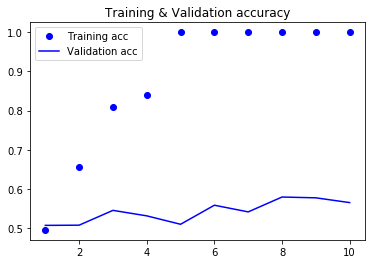

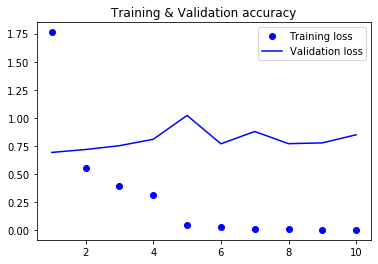

<Figure size 432x288 with 0 Axes>

In [63]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training & Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training & Validation accuracy")
plt.legend()
plt.figure()
plt.show()

In [64]:
#### Evaluate

In [57]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            with open(os.path.join(dir_name, fname), encoding="UTF-8") as fn:
                texts.append(fn.read())
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [65]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 54us/step


[0.8598331770706177, 0.559440016746521]

#### 也是可以用Keras 內建的Embedding 學習，那就不用凍結向量層，但是可能需要更大量的字彙去訓練，才會有更好的結果

In [54]:
# # 範例
# model = Sequential()
# model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
# model.add(Flatten())
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 300)          3000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                960032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 3,960,065
Trainable params: 3,960,065
Non-trainable params: 0
_________________________________________________________________


#### 小結：在訓練樣本不足的情況下，使用預先訓練的嵌入向量會比較好。

### RNN

#### 意象

In [74]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))
successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
#     print(np.array(successive_outputs).shape)
    state_t = output_t # 更新的感覺

#### Simple RNN

#### Inputs: shape=(batch_size, timesteps, input_features)

**Return_sequences 用在你想要堆疊神經網路,作為下一個的output**<br>
* Return_sequences=True 回傳所有時間點的連續輸出完整序列資料(3D)
* Return_sequences=False 只回傳對每個序列資料的最後一個輸出(2D)

In [75]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


#### IMDB範例

In [78]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500

batch_size = 32
print('Loading..')
(X_train, y_train), (X_test, y_test) = imdb.load_data()
print(f'Train sequences: {len(X_train)} , Test sequences: {len(X_test)}')

Loading..
Train sequences: 25000 , Test sequences: 25000


In [80]:
print('Pad sequences (sample x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print(f'Train sequences: {X_train.shape} , Test sequences: {X_test.shape}')

Pad sequences (sample x time)
Train sequences: (25000, 500) , Test sequences: (25000, 500)


In [82]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Users\sychen\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.6617 - accuracy: 0.5912 - val_loss: 0.6097 - val_accuracy: 0.6458
Epoch 2/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.4383 - accuracy: 0.8098 - val_loss: 0.4476 - val_accuracy: 0.7956
Epoch 3/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.3063 - accuracy: 0.8759 - val_loss: 0.5310 - val_accuracy: 0.7558
Epoch 4/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.2274 - accuracy: 0.9123 - val_loss: 0.4678 - val_accuracy: 0.7840
Epoch 5/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.1512 - accuracy: 0.9471 - val_loss: 0.3878 - val_accuracy: 0.8566
Epoch 6/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.0918 - accuracy: 0.9701 - val_loss: 0.5089 - val_accuracy: 0.8036
Epoch 7/10
20000/20000 [==============================] - 38s 2ms/ste

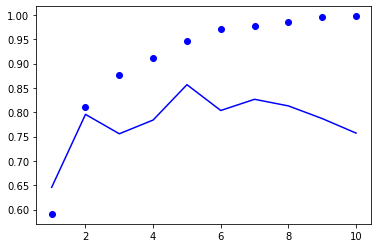

In [84]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Validation acc')

#### 改用LSTM

In [86]:
from keras.layers import Dense, LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [87]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Users\sychen\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 61s 3ms/step - loss: 0.5387 - accuracy: 0.7495 - val_loss: 0.5140 - val_accuracy: 0.7732
Epoch 2/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.3284 - accuracy: 0.8669 - val_loss: 0.3854 - val_accuracy: 0.8352
Epoch 3/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2465 - accuracy: 0.9043 - val_loss: 0.2843 - val_accuracy: 0.8836
Epoch 4/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.2083 - accuracy: 0.9222 - val_loss: 0.3000 - val_accuracy: 0.8882
Epoch 5/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1805 - accuracy: 0.9325 - val_loss: 0.2840 - val_accuracy: 0.8896
Epoch 6/10
20000/20000 [==============================] - 59s 3ms/step - loss: 0.1602 - accuracy: 0.9427 - val_loss: 0.3469 - val_accuracy: 0.8864
Epoch 7/10
20000/20000 [==============================] - 65s 3ms/ste

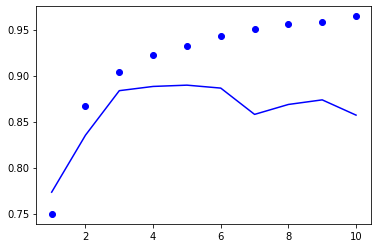

In [88]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label='Validation acc')

### Advanced

* Recurrent dropout
* Stacking recurrent layers
* Bidirectional recurrent layers

#### Example

In [95]:
fname = os.path.join(f"data", "jena_climate_2009_2016.csv")
with open(fname) as fn:
    data = fn.read()
lines = data.split('\n')
header = lines[0].split(',') # drop the header
lines = lines[1:]
print(header)
print(len(lines), "筆資料")

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551 筆資料


In [96]:
import matplotlib.pyplot as plt
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]] # 不含日期
    float_data[i: ] = values # 第i個 塞滿他
print(float_data.shape)

(420551, 14)


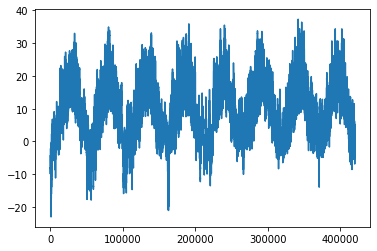

In [98]:
tmp = float_data[:, 1]
plt.plot(range(len(tmp)), tmp)

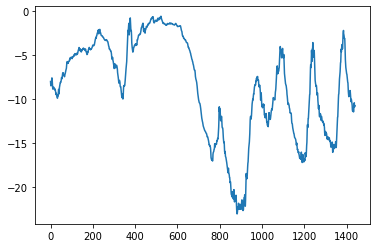

In [99]:
plt.plot(range(1440), tmp[:1440])

In [103]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean

In [106]:
std = float_data[:200000].std(axis=0)
float_data /=std

In [107]:
float_data

array([[ 0.90014748, -1.93135845, -1.98211036, ..., -0.72950452,
        -0.78067973, -0.27613603],
       [ 0.9060434 , -1.97541381, -2.02567   , ..., -0.93124017,
        -0.88794488, -0.46317443],
       [ 0.90132666, -1.98671006, -2.03683914, ..., -1.27614304,
        -1.26122763, -0.05330633],
       ...,
       [ 1.28927851, -1.38236094, -1.46721307, ..., -0.69696652,
        -0.67341457,  0.45008097],
       [ 1.28809932, -1.50323076, -1.58672285, ..., -0.43015486,
        -0.60476487,  0.57246412],
       [ 1.28927851, -1.56987861, -1.65150386, ..., -0.5993525 ,
        -0.690577  ,  0.10024989]])

In [132]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data)-delay-1
    
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index+lookback, max_index, size=batch_size)
        else:
            if i+batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i+batch_size, max_index))
            i += len(rows)
            samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
            target = np.zeros((len(rows), ))
            for j, row in enumerate(rows):
                indices = range(rows[j]-lookback, rows[j], step)
                samples[j] = data[indices]
                target[j] = data[rows[j] + delay][1]
                
            yield samples, target

In [133]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback, 
                      delay=delay, 
                      min_index=0, 
                      max_index=200000, 
                      shuffle=True, 
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                      lookback=lookback, 
                      delay=delay, 
                      min_index=200001, 
                      max_index=300000, 
                      shuffle=True, 
                      step=step, 
                      batch_size=batch_size)
test_gen = generator(float_data,
                      lookback=lookback, 
                      delay=delay, 
                      min_index=300001, 
                      max_index=None, 
                      shuffle=True, 
                      step=step, 
                      batch_size=batch_size)
val_steps = (300000-200001-lookback) // batch_size
test_steps = (len(float_data)-300001-lookback) // batch_size

In [ ]:
from tqdm.notebook import trange
def evaluate_naive_method():
    batch_maes=[]
    for step in trange(val_steps):
        samples, targets = next(val_gen)
        print(samples.shape)
        print(targets.shape)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
evaluate_naive_method()